## Problem 1: Manual SLR on Crypto Trends (NumPy & Matplotlib)

**The Objective:** Predict Bitcoin's market price using **Simple Linear Regression** by analyzing the relationship between time (days) and price.



### Part A: Data Fetching & Preprocessing

* **Data Source:** Load the raw CSV from: `https://raw.githubusercontent.com/Yrzxiong/Bitcoin-Dataset/refs/heads/master/bitcoin_dataset.csv`
* **Filtering:** Use `.tail(50)` to extract the most recent 50 days of data. Ensure you use `.copy()` to avoid the `SettingWithCopyWarning`.
* **Feature Engineering ($X$):** Instead of using the `Date` column, use a **list comprehension** to create a new column called `day_index` containing integers from $0$ to $49$.
* **Target Selection ($y$):** Isolate the **`btc_market_price`** column as your  variable.


In [67]:
import pandas as pd
url = 'https://raw.githubusercontent.com/Yrzxiong/Bitcoin-Dataset/refs/heads/master/bitcoin_dataset.csv'

df = pd.read_csv(url)
last_days = df.tail(50)
index = pd.Series([i for i in range(0,50)])
last_days['index'] = index.values

(last_days.head(1))

X = pd.Series(last_days['index']).values

y = pd.Series(last_days['btc_market_price']).values


R:\Temp\ipykernel_29432\3476044779.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_days['index'] = index.values


### Part B: Manual SLR Calculation (The NumPy Math)
Using **NumPy**, calculate the line of best fit. You must not use `sklearn` for this specific part.

1. Calculate the mean of $X$ ($\bar{x}$) and the mean of $y$ ($\bar{y}$).
2. Calculate the Slope ($\beta_1$):
    $$\beta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$$
3. Calculate the Intercept ($\beta_0$):
    $$\beta_0 = \bar{y} - \beta_1\bar{x}$$

In [68]:
# method 1 pandas only
x_norm = X - X.mean()
y_norm = y - y.mean()

b1 = (x_norm*y_norm).sum() / (x_norm*x_norm).sum()
b0 = y.mean() - b1*X.mean()
print(b0)
print(b1)

# method 2 using numpy

import numpy as np
x_norm  = X - np.mean(X)
y_norm  = y - np.mean(y)
b1 = np.sum((x_norm)*(y_norm)) / np.sum((x_norm)*(x_norm))
b0 = y.mean() - b1*X.mean()
print(b0)
print(b1)

17831.26760592941
-148.300867172629
17831.26760592941
-148.300867172629




### Part C: Prediction & Visualization

* **Lambda Prediction:** Define a **lambda function** `predict = lambda x: beta_0 + beta_1 * x`.
* **Plotting:** Use **Matplotlib** to:
1. Create a scatter plot of `day_index` vs. `btc_market_price`.
2. Use your lambda function to generate predicted prices for every  in your index.
3. Draw the red regression line over the scatter plot.
4. Add a title, axis labels, and a legend displaying the final equation ().
---

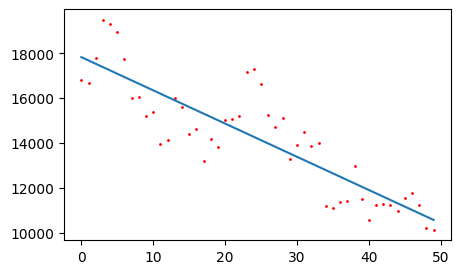

In [69]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,3))
ax.scatter(X,y,s=1,c='red')

def func(val):
    return b0 + b1*val

y_min = func(X.min())
y_max = func(X.max())

x_line = [X.min(),X.max()]
y_line = [y_min,y_max]

ax.plot(x_line,y_line)


## Problem 2: E-Commerce Inventory System (OOP & JSON)

**The Objective:** Model a product management system using **Inheritance** and **Encapsulation** to handle data from the [Fake Store API](https://fakestoreapi.com/products).
- **Part A (Classes & Encapsulation):** Create a base class `Product`.
    - Store the price as a **private attribute** (e.g., `self.__price`).
    - Use a child class `ElectronicProduct` (**Inheritance**) that adds a 15% import tax to the price.
    - Implement a method `get_info()` that works differently for both classes (**Polymorphism**).
- **Part B (Data Pairing):** Fetch the JSON data. Use **zip** to combine the list of titles and the list of prices. Use **enumerate** to iterate through them and instantiate your objects, giving each a "Shelf ID" based on its loop index.
- **Part C (Storage):** Generate a list of dictionaries containing the processed names and taxed prices using a **list comprehension**. Save this to a local `inventory.json` file.

---




## Problem 3: Decision Tree Activity Classifier (sklearn & API)

**The Objective:** Predict whether it is a "Good Day" for an outdoor event based on live weather data from the [Open-Meteo API](https://open-meteo.com/).

- **Part A (Feature Engineering):** Fetch current weather data (Temperature, Windspeed, and Humidity).
- **Part B (The Model):** Create a small training set (dictionary) of 10 "Past Days" where:
    - $X$ = `[[Temp, Wind, Humidity]]`
    - $y$ = `[1 if Good Day, 0 if Bad Day]`
    - Convert these to **NumPy** arrays and train a `DecisionTreeClassifier` from **sklearn**.
- **Part C (Prediction & Visualization):** Use your model to predict the class of the "Current Weather" you fetched from the API. Use **Matplotlib** to create a bar chart showing the "Feature Importance" (which variable mattered most to the tree).

---



## Problem 4: Real Estate MLR (sklearn & Dictionary Manipulation)

**The Objective:** Use Multiple Linear Regression (MLR) to determine how "Square Footage" ($x_1$) and "Number of Rooms" ($x_2$) influence "House Price" ($y$).

- **Part A (Lambda Cleaning):** Load a sample housing CSV from a raw GitHub source. Use a **lambda function** to clean the "Price" column (e.g., removing "$" and commas) before converting it to a float.
- **Part B (MLR Model):** Use `LinearRegression` from `sklearn` to fit the model: $$y = \beta_0 + \beta_1x_1 + \beta_2x_2$$
- **Part C (Ranking Drivers):** Extract the coefficients. Use a **dictionary** to map the feature names to their respective coefficients. Sort this dictionary to identify which feature has the highest impact on the price and print it using a formatted string.

---



## Problem 5: Integrated Audit Pipeline (File I/O & Pandas)

**The Objective:** Build a robust data pipeline that correlates local security logs with user data from the [JSONPlaceholder API](https://jsonplaceholder.typicode.com/users).

- **Part A (File Processing):** Read a local `logs.txt` file (containing lines like `User 5: Success` or `User 2: Failed`). Use **enumerate** to find the line numbers of all "Failed" attempts.
- **Part B (API Data Merge):** Use a **list comprehension** to extract the unique User IDs from those failed attempts. For each ID, fetch the user's name and email from the API.
- **Part C (Final Report):** Combine the API data with the log status into a single **dictionary**. Use **Pandas** to convert this list of dictionaries into a DataFrame and export it to a file named `security_breach_report.csv`. Ensure you handle any potential missing data using **NumPy**'s `np.nan`.
